In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns

In [2]:
# データの読み込み
train_df = pd.read_csv('./titanic/train.csv')
test_df = pd.read_csv('./titanic/test.csv')
combine = [train_df, test_df]

# 中身の確認 

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [689]:
print(train_df.columns)
print(test_df.columns) # 'Survived'がない
print(train_df.shape, test_df.shape)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
(891, 12) (418, 11)


In [690]:
train_df.info()
print()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass 

train_df では、'Age', 'Cabin', 'Embarked'のデータの穴埋めが必要。
test_df では、'Age', 'Cabin', 'Fare' に穴埋めが必要。
ただし、'Name', 'Cabin'は個人を特定するものなで、必要なさそう。
'Fare'は、'Embarked', 'Age', 'Pclass'で穴を埋められるのではと考える。
'Age'は、、ランダムで決めるしかないかな、、？
'Embarked'は'Fare'の反対でたぶんOK

In [691]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [692]:
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Vander Planke, Mr. Leo Edmondus",male,347082,B96 B98,S
freq,1,577,7,4,644


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff52dbf1710>,
      dtype=object)

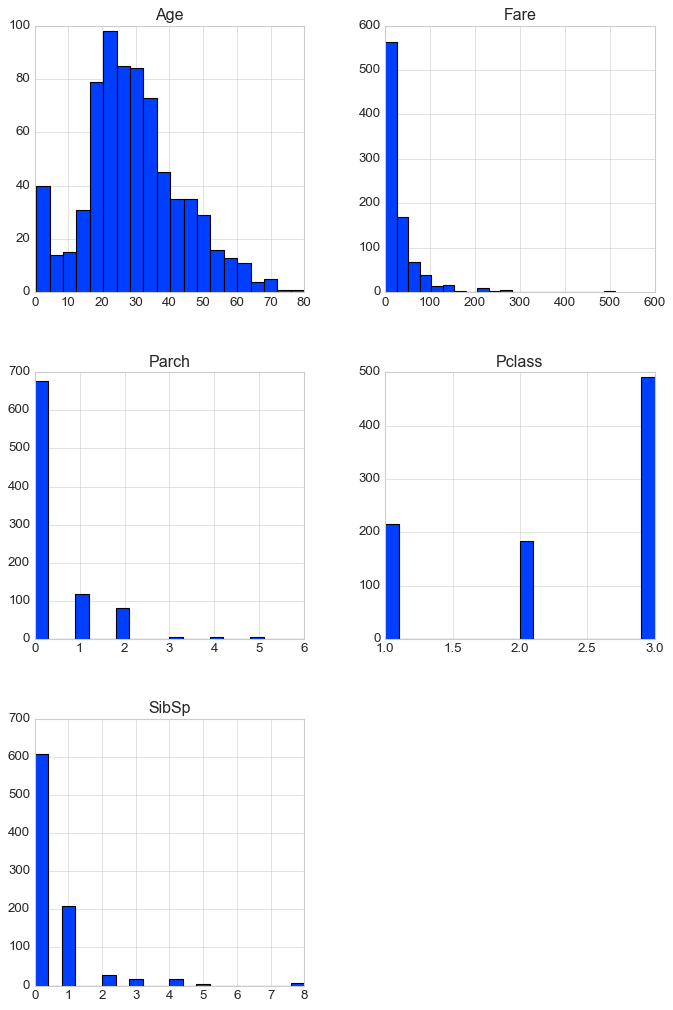

In [42]:
plt.style.use('seaborn-bright') # figureのスタイルを変えられる（https://note.com/natto_nebaneba/n/n2eaa9d02135e）
train_df.loc[:, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].hist(figsize=(10, 15), bins=20)

In [694]:
len(train_df[train_df['Fare'] > 400])

3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff52cbc3790>]],
      dtype=object)

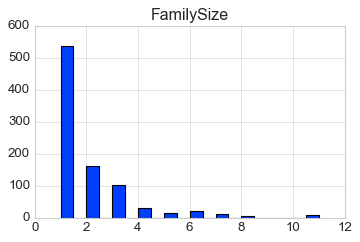

In [45]:
combine = [train_df, test_df]
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df.loc[:, ['FamilySize']].hist(figsize=(5, 3), bins=20)

・ 'Age': ２０〜３０代が多いが、意外と５才くらいまでの乳幼児も多い。最高年齢は８０才。
・ 'Fare': 'Pclass'とも相関するが、下級層が多い様子。上の表でも、中間値が14ドル、3/4分位数でも31ドルとなっている。
　　　　　　　　　　　　　　３００〜４００ドルはいなさそうで、４００ドル以上が３名だけいる。
・ 'Pclass': 上記同様。約半数が'Pclass == 3'で、一番低いクラス。まあ想像通り。
・'Parch', 'SibSp': どちらも0が大半。'Parch', 'SibSp'のどちらか・もしくは一人で乗った人が多いのか？
　　　　　　　　　　　　　　　　　　　　　　　　　　　これだけではわからないので、'FamilySize'で確認・ひとりで乗った人が多い様子。

# 各項目と'Survived'の相関

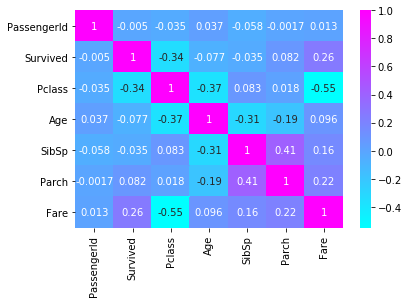

In [17]:
sns.heatmap(train_df.corr(),annot = True, cmap='cool')

# 相関に関する補足補足
# https://www.trunktools.jp/services/analysis/correl.html

In [20]:
train_df[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [697]:
train_df[['Sex', 'Survived']].groupby('Sex', as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feaf8c1aa10>,
      dtype=object)

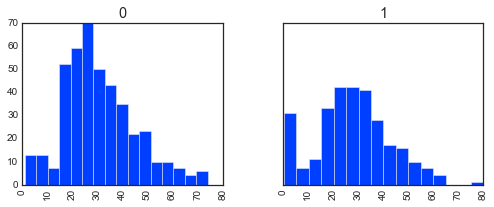

In [698]:
train_df['Age'].hist(by=train_df['Survived'], bins=16, figsize=(8, 3), sharey=True)

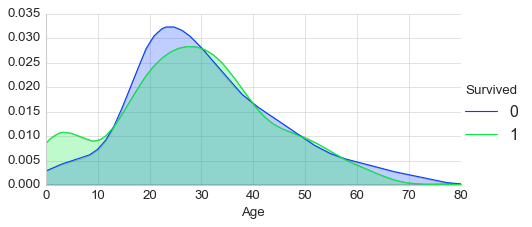

In [43]:
fig = sns.FacetGrid(train_df, hue='Survived', aspect=2)
fig.map(sns.kdeplot, 'Age',shade= True)
fig.set(xlim=(0, train_df['Age'].max()))
fig.add_legend()

In [70]:
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()# .sort_values('Survived', ascending=False)


,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [702]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feadecd3f10>,
      dtype=object)

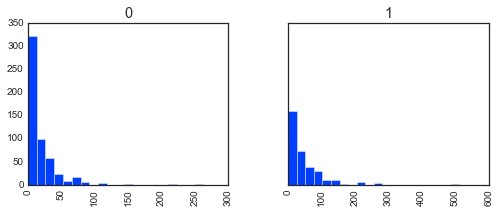

In [703]:
train_df['Fare'].hist(by=train_df['Survived'], bins=20, figsize=(8, 3), sharey=True)

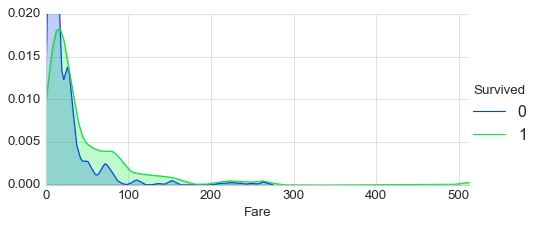

In [78]:
fig = sns.FacetGrid(train_df, hue='Survived', aspect=2)
fig.map(sns.kdeplot, 'Fare', shade= True)
fig.set(xlim=(0, train_df['Fare'].max()), ylim=(0, 0.02))
fig.add_legend()

'Pclass': Ticket classが高いほど、生存率が高く、相関があると言える。
'Sex': 明らかに女性の方が生存率が高く、高い相関がある
'Age': 16才以下くらいまでは生存率が高い。特に５才未満の乳幼児は2/3以上が生き残った様子。
'SibSp''Parch': 関係性は読み取りにくい。
'FamilySize': ２人のうち１人、３人のうち１〜２人、４人のうち３人は生存している。逆に、一人で来た人は３割しか生存していない。また、５人以上になると、グループの中の１人までしか生存できていない。相関がありそうに感じるが、'Pclass'もしくは'Age'も関連しているのかもしれない。
※追記・・・どうやら、全員が載っているわけではない様子。Pclass=1, Pclass=2の'FamilySize=5'はそれぞれ１人しかいなかった。

'Embarked': Survivedとの関連はあまりなさそうに思われる。
'Fare': 安いそうが多いから目立つけど、割合で見ると、やはり高いお金払ってる人の方が助かってる。数少ない500ドル代は全員助かってるみたいだし。

# 2つ以上の要素と'Survived'の相関

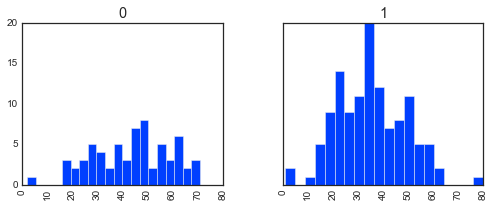

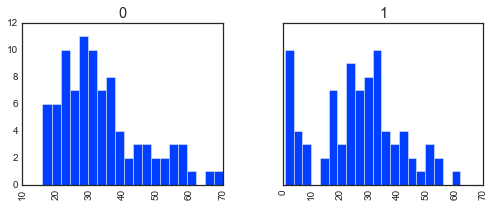

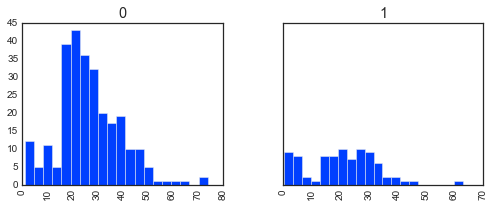

In [704]:
# 'Pclass'別の'Age（x軸）'と'Survived（y軸）'の相関
for x in range(1, 4):
    graph = train_df[train_df['Pclass'] == x][['Age']].hist(by=train_df['Survived'], bins=20, figsize=(8, 3), sharey=True)

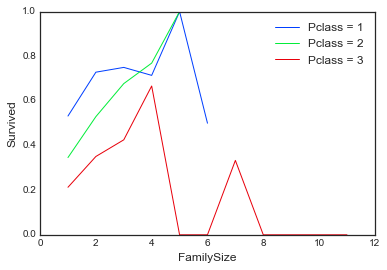

1


In [705]:
# 'Pclass'別の'FamilySize（x軸）'と'Survived（y軸）'の相関
df = train_df[['Pclass', 'FamilySize', 'Survived']].groupby(['Pclass', 'FamilySize'], as_index=False).mean()
df_Pclass1 = df[df['Pclass'] == 1].sort_values('FamilySize')
df_Pclass2 = df[df['Pclass'] == 2].sort_values('FamilySize')
df_Pclass3 = df[df['Pclass'] == 3].sort_values('FamilySize')

plt.plot(df_Pclass1['FamilySize'], df_Pclass1['Survived'], label='Pclass = 1')
plt.plot(df_Pclass2['FamilySize'], df_Pclass2['Survived'], label='Pclass = 2')
plt.plot(df_Pclass3['FamilySize'], df_Pclass3['Survived'], label='Pclass = 3')

plt.legend()
plt.xlabel("FamilySize")
plt.ylabel("Survived")
plt.show()

print(len(df_Pclass2[df_Pclass2['FamilySize'] == 5]))


# 穴埋め

In [706]:
# まずは'Fare'
# 'Embarked', 'Age', 'Pclass'との相関を確認する。

# その前に、扱いやすくするために、データの編集から
# 'Embarked'を'C':1, 'Q':2, 'S':3にする。

combine = [train_df, test_df]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].replace({'C':1, 'Q':2, 'S':3})

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,3.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,3.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,3.0,1


[[0, 0, 0], [0, 0, 0], [0, 0, 0]]


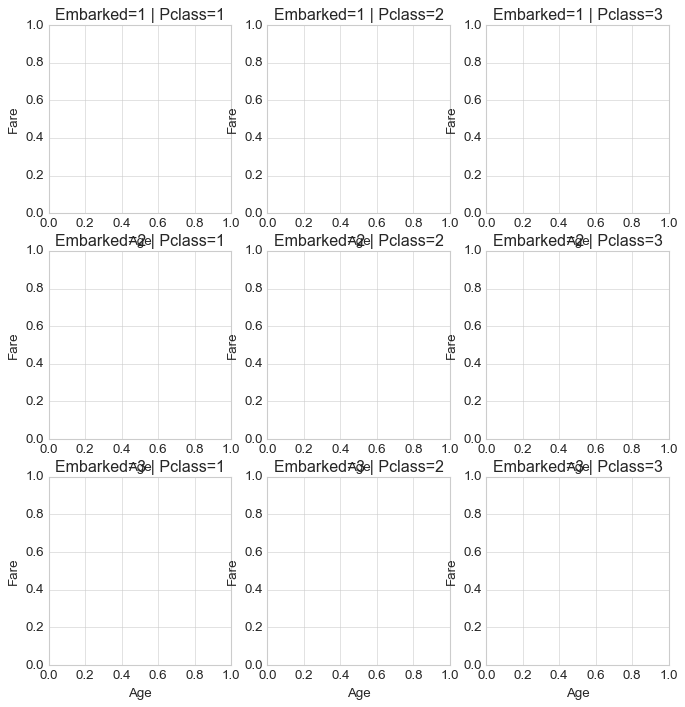

In [79]:
# 今度こそ、、
# 'Embarked', 'Age', 'Pclass'との相関を確認する。

df_list = list([0]*3 for n in range(3))
print(df_list)
# train_df[(train_df['Embarked'] == e[0]) & (train_df['Pclass'] == p[0])][['Age','Fare']]

for i in range(0, 3):
    for j in range(0, 3):
        df_list[i][j] = train_df[(train_df['Embarked'] == i+1) & (train_df['Pclass'] == j+1)][['Age','Fare']].dropna()

# print(type(df_list))
# print(df_list)

#df = train_df[(train_df['Embarked'] == 3) & (train_df['Pclass'] == 1)][['Age','Fare']]
#plt.bar(df['Age'], df['Fare'])

fig, axes = plt.subplots(3, 3, figsize=(10,10))
# print(axes)
# print()
# print(axes[0])
# print(axes[0,0])

# axes[0, 0].bar(df_list[0]['Age'], df_list[0]['Fare'])

for k in range(0, 3):
    for l in range(0, 3):
        axes[k, l].bar(df_list[k][l]['Age'], df_list[k][l]['Fare'])
        axes[k, l].set_title("Embarked={0} | Pclass={1}".format(k+1, l+1))
        axes[k, l].set_xlabel('Age')
        axes[k, l].set_ylabel('Fare')
        #axes[k, l].set_ylim([0, 100])

In [708]:
train_df[['Embarked', 'Pclass', 'Age', 'Fare', 'Survived']].groupby(['Embarked', 'Pclass']).mean()


Age        Fare  Survived
Embarked Pclass                                 
1.0      1       38.027027  104.718529  0.694118
         2       22.766667   25.358335  0.529412
         3       20.741951   11.214083  0.378788
2.0      1       38.500000   90.000000  0.500000
         2       43.500000   12.350000  0.666667
         3       25.937500   11.183393  0.375000
3.0      1       38.152037   70.364862  0.582677
         2       30.386731   20.327439  0.463415
         3       25.696552   14.644083  0.189802

それぞれが一次関数みたいに右肩上がりになるのを期待していたが、関係なさそう。
ただ、Pclassで大体の'Fare'はつかめそう。
あと、５０代以降はシニア割りみたいなのがあるのかな、、？
年齢を１０代、２０代とかでくぎってみるか？ Ageの穴埋めしてから戻ってくる！

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]


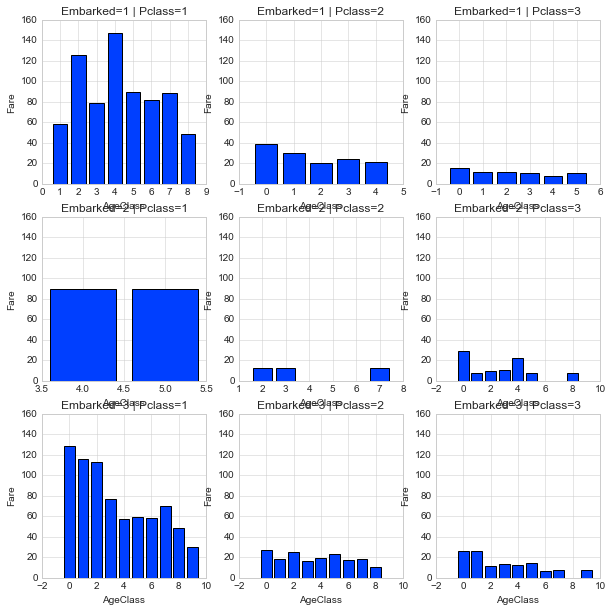

In [84]:
df_list = list([0]*3 for n in range(3))
print(df_list)

# train_df[(train_df['Embarked'] == i+1) & (train_df['Pclass'] == j+1)][['AgeBand','Fare']].groupby(['AgeBand']).mean().dropna()

for i in range(0, 3):
    for j in range(0, 3):
        df_list[i][j] = train_df[(train_df['Embarked'] == i+1) & (train_df['Pclass'] == j+1)][['AgeClass','Fare']].groupby(['AgeClass'], as_index=False).mean()

fig, axes = plt.subplots(3, 3, figsize=(10,10))

for k in range(0, 3):
    for l in range(0, 3):
        axes[k, l].bar(df_list[k][l]['AgeClass'], df_list[k][l]['Fare'])
        axes[k, l].set_title("Embarked={0} | Pclass={1}".format(k+1, l+1))
        axes[k, l].set_xlabel('AgeClass')
        axes[k, l].set_ylabel('Fare')
        axes[k, l].set_ylim([0, 160])

In [726]:
print(train_df[(train_df['Pclass'] == 3) & (train_df['Embarked'] == 3)][['Fare']].median())
print(train_df[(train_df['Pclass'] == 3) & (train_df['Embarked'] == 3)][['Fare']].mean())
print(train_df[(train_df['Pclass'] == 3) & (train_df['Embarked'] == 3)][['Fare']].mode()) # 最頻値

train_df[['Embarked', 'Pclass', 'AgeClass', 'Fare', 'Survived']].groupby(['Embarked', 'Pclass']).median()

# 'Fare'は'Embarked', 'Pclass'でOK


Fare    8.05
dtype: float64
Fare    14.644083
dtype: float64
   Fare
0  8.05


AgeClass     Fare  Survived
Embarked Pclass                             
1.0      1            4.0  78.2667       1.0
         2            3.0  24.0000       1.0
         3            3.0   7.8958       0.0
2.0      1            4.5  90.0000       0.5
         2            3.0  12.3500       1.0
         3            3.0   7.7500       0.0
3.0      1            4.0  52.0000       1.0
         2            3.0  13.5000       0.0
         3            3.0   8.0500       0.0

In [727]:
test_df[test_df.Fare.isnull() == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,AgeBand,AgeClass
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,3,1,4,"(53.2, 60.8]",7.0


In [728]:
# 'Fare'の穴埋め

guess_fare_list = np.zeros((3, 3)) # 'Embarked' * 'Pclass'

combine = [train_df, test_df]
for dataset in combine:
    for e in range(0, 3):
        for p in range(0, 3):
            guess_df = dataset[(dataset['Embarked'] == e+1) & (dataset['Pclass'] == p+1)]['Fare'].dropna()
            guess_ages_list[e, p] = int(guess_df.median())
            
    for e in range(0,3):
        for p in range(0, 3):
            dataset.loc[(dataset.Fare.isnull()) & (dataset.Embarked == e+1) & (dataset.Pclass == p+1), 
                        'Fare'] = guess_fare_list[e, p]
    
print(guess_fare_list)
test_df[test_df['PassengerId'] == 1044]


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,AgeBand,AgeClass
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,0.0,NaN,3,1,4,"(53.2, 60.8]",7.0


## 'Embarked' 穴埋め

In [729]:
# 最後に、'Embarked'

train_df[train_df.Embarked.isnull() == True]
# 空白は下の２つだけ。test_dfはなし。

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,AgeBand,AgeClass
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,3,"(32.252, 40.21]",4.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,5,"(56.126, 64.084]",7.0


In [730]:
train_df[['Title', 'Embarked', 'Survived']].groupby(['Title', 'Embarked']).count()
# 'Dr':1, 'Master':2, 'Miss':3, 'Mr':4, 'Mrs':5, 'Ms':6, 'Other':0

# よくよく考えたら、Embarkedの穴ぼこはtrain_dfだけだから埋めなくても良さそうかも。
# 必須だった、、

freq_port = train_df.Embarked.dropna().mode()[0]

combine = [train_df, test_df]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

## 'Age' 穴埋め

In [709]:
# ということで、次は'Age'
# 本当は'Survived'と相関が強そうだけど、、；；　test_dfでも抜けがあるから、その手は仕えない、、
# 'Name'の敬称と'Pclass'からわからないかな、、

# 敬称の取り出し('Title'に格納)
combine = [train_df, test_df]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    # 文字列を正規表現で複数の列に分割。（≒ str.split()）
    # expand = Falseフラグは、データフレームを返す。    

# pd.crosstab(train_df['Title'], train_df['Age'])
# ややこしいので、現在の状況で一旦'Age'を分割。とりあえず５才刻みで。
train_df['AgeBand'] = pd.cut(train_df['Age'], 16)
df = pd.crosstab(train_df['Title'], train_df['AgeBand'])
df.index

Index(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major',
       'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'],
      dtype='object', name='Title')

In [711]:
# 一部わかるものもある。
# Masterは、５才までが多い。Googlで調べたところ、実際〇〇お坊っちゃまって意味らしい。
# Missのような未婚女性は、乳幼児も入るのね、、しかも、意外と上の年齢の人も多い。
# ていうか、１０代前半で既婚の人もいる、、
# この中で使えるのはMasterだけ

# ちなみに、空白があるのは下記。
train_df[(train_df.Age.isnull())][['Title', 'PassengerId']].groupby(['Title']).count()

,PassengerId
Title,
Dr,1
Master,4
Miss,36
Mr,119
Mrs,17


In [712]:
# test_dfで空白のある敬称
df = test_df[(test_df.Age.isnull())][['Title', 'PassengerId']].groupby(['Title']).count()
df.index

Index(['Master', 'Miss', 'Mr', 'Mrs', 'Ms'], dtype='object', name='Title')

In [713]:
# Dr, Master, Miss, Mr, Mrs以外は一旦丸めることにする。

combine = [train_df, test_df]
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace([
        'Capt', 'Col', 'Countess', 'Don', 'Jonkheer', 'Lady', 'Major',
       'Mlle', 'Mme', 'Rev', 'Sir', 'Dona'],
    'Other')
    
pd.crosstab(train_df['Title'], train_df['AgeBand'])

AgeBand,"(0.34, 5.394]","(5.394, 10.368]","(10.368, 15.341]","(15.341, 20.315]","(20.315, 25.289]","(25.289, 30.263]","(30.263, 35.236]","(35.236, 40.21]","(40.21, 45.184]","(45.184, 50.158]","(50.158, 55.131]","(55.131, 60.105]","(60.105, 65.079]","(65.079, 70.052]","(70.052, 75.026]","(75.026, 80.0]"
Title,,,,,,,,,,,,,,,,
Dr,0,0,0,0,1,0,1,0,1,2,1,0,0,0,0,0
Master,23,10,3,0,0,0,0,0,0,0,0,0,0,0,0,0
Miss,21,10,10,27,29,18,11,10,3,3,1,2,1,0,0,0
Mr,0,0,4,62,76,70,57,40,26,24,12,9,11,2,4,1
Mrs,0,0,2,7,13,17,18,15,15,8,7,4,2,0,0,0
Ms,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Other,0,0,0,0,3,2,1,2,2,2,3,3,0,1,0,0


In [714]:
# 'SibSp', 'Parch'あたりで予想つかないかな？
pd.crosstab(train_df['SibSp'], train_df['AgeBand'])
pd.crosstab(train_df['Parch'], train_df['AgeBand'])
pd.crosstab(train_df['FamilySize'], train_df['AgeBand'])
train_df[['AgeBand', 'SibSp', 'Parch', 'FamilySize']].groupby(['AgeBand']).mean().head(50)
# train_df[train_df['Age'] <= 15.341][['AgeBand', 'SibSp', 'Parch', 'FamilySize']].head(50)
# train_df[train_df['Age'] > 15.341][['AgeBand', 'SibSp', 'Parch', 'FamilySize']].head(50)
# FamilySizeが３以上なら１５．３４１才以下の確率が高い。
# 70代以上の人は必ず１人だけど、１人で乗ってる人が７０代とは言えない。


,SibSp,Parch,FamilySize
AgeBand,,,
"(0.34, 5.394]",1.704545,1.363636,4.068182
"(5.394, 10.368]",2.150000,1.550000,4.700000
"(10.368, 15.341]",1.368421,0.736842,3.105263
"(15.341, 20.315]",0.437500,0.322917,1.760417
"(20.315, 25.289]",0.352459,0.303279,1.655738
"(25.289, 30.263]",0.287037,0.166667,1.453704
"(30.263, 35.236]",0.352273,0.181818,1.534091
"(35.236, 40.21]",0.402985,0.671642,2.074627
"(40.21, 45.184]",0.340426,0.595745,1.936170


Pclass = 1


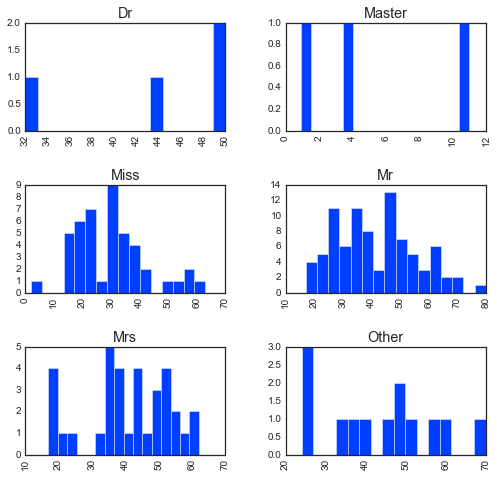


Pclass = 2


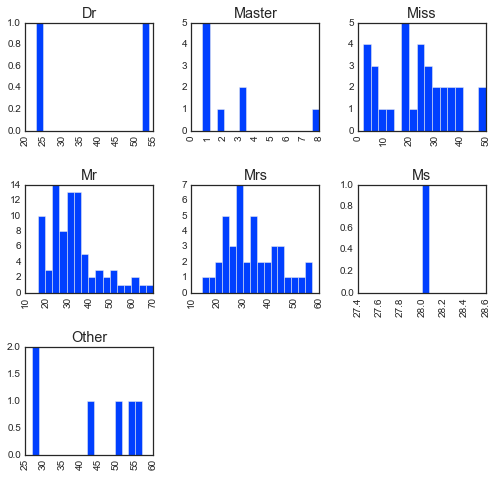


Pclass = 3


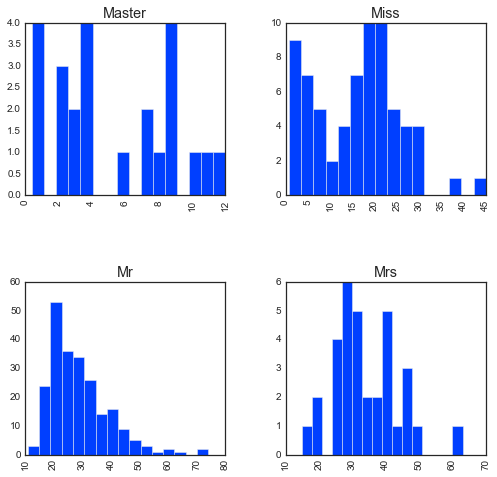

In [715]:
# 'Pclass'ごとの、'Title'について'Age'のヒストグラムを作ってみる。・・・日本語、変。

for x in range(1, 4):
    print('Pclass = {}'.format(x))
    train_df[train_df['Pclass'] == x]['Age'].hist(by=train_df['Title'], bins=16, figsize=(8, 8))
    plt.show()
    print()

# 関係あるようなないような、、

In [716]:
print(train_df[(train_df['Pclass'] == 1) & (train_df['Title'] == 'Master')][['Age']].median())
print(train_df[(train_df['Pclass'] == 1) & (train_df['Title'] == 'Master')][['Age']].mean())
print(train_df[(train_df['Pclass'] == 1) & (train_df['Title'] == 'Master')][['Age']].mode()) # 最頻値

# とは言え、ある程度傾向はつかめてる気がするから、これで穴埋めするのだ。

Age    4.0
dtype: float64
Age    5.306667
dtype: float64
     Age
0   0.92
1   4.00
2  11.00


In [717]:
# まずは、使いやすくするために、'Title'を数値化。
#df = pd.crosstab(train_df['Title'], train_df['AgeBand'])
#df.index

combine = [train_df, test_df]
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace({'Dr':1, 'Master':2, 'Miss':3, 'Mr':4, 'Mrs':5, 'Ms':6, 'Other':0})
    
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,2,1,4
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,3,2,5
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,2,1,4
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,3,1,4
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,3,3,5


In [718]:
train_df[train_df.Age.isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,AgeBand
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,2.0,1,4,NaN
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,3.0,1,4,NaN
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,1.0,1,5,NaN
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,1.0,1,4,NaN
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,2.0,1,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,1.0,1,4,NaN
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,3.0,11,3,NaN
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,3.0,1,4,NaN
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,3.0,1,4,NaN


In [719]:
# 'Age'の穴埋め

guess_ages_list = np.zeros((3, 6)) # 'Pclass' * 'Title'

combine = [train_df, test_df]
for dataset in combine:
    for p in range(0, 3):
        for t in range(0, 6):
            if len(dataset[(dataset['Pclass'] == p+1) & (dataset['Title'] == t+1)]['Age'].dropna()) == 0:
                guess_ages_list[p, t] = 0
            else:
                guess_df = dataset[(dataset['Pclass'] == p+1) & (dataset['Title'] == t+1)]['Age'].dropna()
                guess_ages_list[p, t] = int(guess_df.median())
            
    for p in range(0,3):
        for t in range(0, 6):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Pclass == p+1) & (dataset.Title == t+1), 
                        'Age'] = guess_ages_list[p, t]
    
print(guess_ages_list)
train_df.head(30)

            

[[53.  9. 32. 42. 48.  0.]
 [ 0.  5. 19. 28. 29.  0.]
 [ 0.  7. 22. 25. 28.  0.]]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,3.0,2,4,"(20.315, 25.289]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1.0,2,5,"(35.236, 40.21]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0,1,3,"(25.289, 30.263]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,3.0,2,5,"(30.263, 35.236]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,3.0,1,4,"(30.263, 35.236]"
5,6,0,3,"Moran, Mr. James",male,26.0,0,0,330877,8.4583,NaN,2.0,1,4,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,3.0,1,4,"(50.158, 55.131]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,3.0,5,2,"(0.34, 5.394]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,3.0,3,5,"(25.289, 30.263]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,1.0,2,5,"(10.368, 15.341]"


In [720]:
dataset[(dataset['Pclass'] == 3) & (dataset['Title'] == 1)]['Age'].dropna()

Series([], Name: Age, dtype: float64)

In [721]:
train_df[train_df.Age.isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,AgeBand


In [722]:
# AgeBandの穴埋め

combine = [train_df, test_df]
for dataset in combine:
    dataset['AgeBand'] = pd.cut(dataset['Age'], 10)

train_df[['AgeBand', 'Survived']].groupby(['AgeBand']).mean().sort_values(by='AgeBand', ascending=True)

list1 = [x for x in range(0, 10)]
list2 = [y*8 for y in range(0, 10)]
list3 = [z*8 for z in range(1, 11)]

combine = [train_df, test_df]
for dataset in combine:
    for x, y, z in zip(list1, list2, list3):
        dataset.loc[(dataset['Age'] > y) & (dataset['Age'] <= z), 'AgeClass'] = x
        
train_df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,AgeBand,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,3.0,2,4,"(16.336, 24.294]",2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1.0,2,5,"(32.252, 40.21]",4.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0,1,3,"(24.294, 32.252]",3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,3.0,2,5,"(32.252, 40.21]",4.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,3.0,1,4,"(32.252, 40.21]",4.0
5,6,0,3,"Moran, Mr. James",male,26.0,0,0,330877,8.4583,NaN,2.0,1,4,"(24.294, 32.252]",3.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,3.0,1,4,"(48.168, 56.126]",6.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,3.0,5,2,"(0.34, 8.378]",0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,3.0,3,5,"(24.294, 32.252]",3.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,1.0,2,5,"(8.378, 16.336]",1.0


In [723]:
list1 = [x for x in range(0, 10)]
list2 = [y*8 for y in range(0, 10)]
list3 = [z*8 for z in range(1, 11)]
print(list1)
print(list2)
print(list3)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 8, 16, 24, 32, 40, 48, 56, 64, 72]
[8, 16, 24, 32, 40, 48, 56, 64, 72, 80]


In [724]:
train_df[train_df.Embarked.isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,AgeBand,AgeClass
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,3,"(32.252, 40.21]",4.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,5,"(56.126, 64.084]",7.0


## 不要なデータの削除

In [4]:
# 現在のデータの確認
train_df.info()
print()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    float64 
 12  FamilySize   891 non-null    int64   
 13  Title        891 non-null    int64   
 14  AgeBand      891 non-null    category
 15  AgeClass     891 non-null    float64 
dtypes: category(1), float64(4), int64(7), object(4)
memory usage: 105.9+ KB

<class 'pandas.core.frame.DataFrame'>
Range

In [5]:
test_df[test_df.AgeClass.isnull() == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,AgeBand,AgeClass
88,980,3,"O'Donoghue, Ms. Bridget",female,0.0,0,0,364856,7.75,NaN,2,1,6,"(-0.076, 7.6]",NaN


In [6]:
test_df.loc[test_df['Age'] == 0, 'AgeClass'] = 0

In [7]:
test_df[test_df.PassengerId == 980]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,AgeBand,AgeClass
88,980,3,"O'Donoghue, Ms. Bridget",female,0.0,0,0,364856,7.75,NaN,2,1,6,"(-0.076, 7.6]",0.0


In [8]:
train_df = train_df.drop(['PassengerId', 'Name', 'Age', 
                          'SibSp', 'Parch', 'Ticket', 'Cabin', 'AgeBand'], axis=1)

test_df = test_df.drop(['PassengerId', 'Name', 'Age', 
                        'SibSp', 'Parch', 'Ticket', 'Cabin', 'AgeBand'], axis=1)

In [9]:
train_df.info()
print()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Fare        891 non-null    float64
 4   Embarked    891 non-null    float64
 5   FamilySize  891 non-null    int64  
 6   Title       891 non-null    int64  
 7   AgeClass    891 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 55.8+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    object 
 2   Fare        418 non-null    float64
 3   Embarked    418 non-null    int64  
 4   FamilySize  418 non-null    int64  
 5   Title       418 non-null  

In [10]:
train_df.head()

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,Title,AgeClass
0,0,3,male,7.2500,3.0,2,4,2.0
1,1,1,female,71.2833,1.0,2,5,4.0
2,1,3,female,7.9250,3.0,1,3,3.0
3,1,1,female,53.1000,3.0,2,5,4.0
4,0,3,male,8.0500,3.0,1,4,4.0


In [11]:
combine = [train_df, test_df]
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].replace({'female': 1, 'male': 0})
    
train_df.head()

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,Title,AgeClass
0,0,3,0,7.2500,3.0,2,4,2.0
1,1,1,1,71.2833,1.0,2,5,4.0
2,1,3,1,7.9250,3.0,1,3,3.0
3,1,1,1,53.1000,3.0,2,5,4.0
4,0,3,0,8.0500,3.0,1,4,4.0


# Restart用まとめ

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns

train_df = pd.read_csv('./titanic/train.csv')
test_df = pd.read_csv('./titanic/test.csv')

combine = [train_df, test_df]
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['Embarked'] = dataset['Embarked'].replace({'C':1, 'Q':2, 'S':3})
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace([
        'Capt', 'Col', 'Countess', 'Don', 'Jonkheer', 'Lady', 'Major',
       'Mlle', 'Mme', 'Rev', 'Sir', 'Dona'],
    'Other')
    dataset['Title'] = dataset['Title'].replace({'Dr':1, 'Master':2, 'Miss':3, 'Mr':4, 'Mrs':5, 'Ms':6, 'Other':0})

guess_ages_list = np.zeros((3, 6)) # 'Pclass' * 'Title'

combine = [train_df, test_df]
for dataset in combine:
    for p in range(0, 3):
        for t in range(0, 6):
            if len(dataset[(dataset['Pclass'] == p+1) & (dataset['Title'] == t+1)]['Age'].dropna()) == 0:
                guess_ages_list[p, t] = 0
            else:
                guess_df = dataset[(dataset['Pclass'] == p+1) & (dataset['Title'] == t+1)]['Age'].dropna()
                guess_ages_list[p, t] = int(guess_df.median())
            
    for p in range(0,3):
        for t in range(0, 6):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Pclass == p+1) & (dataset.Title == t+1), 
                        'Age'] = guess_ages_list[p, t]

combine = [train_df, test_df]
for dataset in combine:
    dataset['AgeBand'] = pd.cut(dataset['Age'], 10)

train_df[['AgeBand', 'Survived']].groupby(['AgeBand']).mean().sort_values(by='AgeBand', ascending=True)

list1 = [x for x in range(0, 10)]
list2 = [y*8 for y in range(0, 10)]
list3 = [z*8 for z in range(1, 11)]

combine = [train_df, test_df]
for dataset in combine:
    for x, y, z in zip(list1, list2, list3):
        dataset.loc[(dataset['Age'] > y) & (dataset['Age'] <= z), 'AgeClass'] = x
        
guess_fare_list = np.zeros((3, 3)) # 'Embarked' * 'Pclass'

combine = [train_df, test_df]
for dataset in combine:
    for e in range(0, 3):
        for p in range(0, 3):
            guess_df = dataset[(dataset['Embarked'] == e+1) & (dataset['Pclass'] == p+1)]['Fare'].dropna()
            guess_fare_list[e, p] = int(guess_df.median())
            
    for e in range(0,3):
        for p in range(0, 3):
            dataset.loc[(dataset.Fare.isnull()) & (dataset.Embarked == e+1) & (dataset.Pclass == p+1), 
                        'Fare'] = guess_fare_list[e, p]

freq_port = train_df.Embarked.dropna().mode()[0]

combine = [train_df, test_df]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
test_df.loc[test_df['Age'] == 0, 'AgeClass'] = 0

train_df = train_df.drop(['PassengerId', 'Name', 'Age', 
                          'SibSp', 'Parch', 'Ticket', 'Cabin', 'AgeBand'], axis=1)

test_df = test_df.drop(['Name', 'Age', 
                        'SibSp', 'Parch', 'Ticket', 'Cabin', 'AgeBand'], axis=1)

combine = [train_df, test_df]
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].replace({'female': 1, 'male': 0})

# 予測

In [112]:
# トレーニングデータ、テストデータの作成

X_train = train_df.drop(['Survived'], axis=1)
y_train = train_df['Survived']

X_test = test_df.drop(['PassengerId'], axis=1)

print(X_train.shape, y_train.shape, X_test.shape)

(891, 7) (891,) (418, 7)


In [114]:
# Test
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_train, y_train, test_size=0.2)

logreg = LogisticRegression()
logreg.fit(X_train_lr, y_train_lr)

acc_log = logreg.score(X_test_lr, y_test_lr)

print(acc_log)

0.776536312849162


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [115]:
# Regressionから

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

models = {"線形回帰": LinearRegression(), "ラッソ回帰": Lasso(), "リッジ回帰": Ridge(), "ロジスティック回帰": LogisticRegression()}
best_model = 0
best_model_name = 0

for name, model in models.items():
    model.fit(X_train_lr, y_train_lr)
    score = model.score(X_test_lr, y_test_lr)
    if score > best_model:
        best_model = score
        best_model_name = name

print("学習モデル: {}".format(best_model_name))
print("ベストスコア: {}".format(best_model))

学習モデル: ロジスティック回帰
ベストスコア: 0.776536312849162


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [119]:
# Classifier

import scipy.stats
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

names = ["SVM", "決定木", "ランダムフォレスト", "k-NN"]
models = [SVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]

max_score = 0
best_model = 0

for name, model in zip(names, models):
    model.fit(X_train_lr, y_train_lr)
    score = model.score(X_test_lr, y_test_lr)
    if score > best_model:
        best_model = score
        best_model_name = name

print("学習モデル: {}".format(best_model_name))
print("ベストスコア: {}".format(best_model))

学習モデル: 決定木
ベストスコア: 0.7821229050279329


In [120]:
# Other

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

names = ['ナイーブベイズ', 'パーセプトロン', '確率的勾配降下法']
models = [GaussianNB(), Perceptron(), SGDClassifier()]

max_score = 0
best_model = 0

for name, model in zip(names, models):
    model.fit(X_train_lr, y_train_lr)
    score = model.score(X_test_lr, y_test_lr)
    if score > best_model:
        best_model = score
        best_model_name = name

print("学習モデル: {}".format(best_model_name))
print("ベストスコア: {}".format(best_model))

学習モデル: ナイーブベイズ
ベストスコア: 0.7653631284916201


In [121]:
# ランダムフォレストのパラメータ調整

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# グリッドサーチ
grid_params = {RandomForestClassifier(): {
        "n_estimators": [i for i in range(10, 20)],
        "max_depth": [i for i in range(1, 10)]}}

best_score = 0
best_param = 0

for model, param in grid_params.items():
    clf = GridSearchCV(RandomForestClassifier(), param)
    clf.fit(X_train_lr, y_train_lr)
    score = clf.score(X_test_lr, y_test_lr)
    if best_score < score:
        best_score = score
        best_param = clf.best_params_

print("パラメーター:{}".format(best_param))
# 最も成績のいいスコアを出力してください。
print("ベストスコア:", best_score)

パラメーター:{'max_depth': 7, 'n_estimators': 16}
ベストスコア: 0.7988826815642458


In [122]:
# ランダムサーチ

rand_param = {RandomForestClassifier(): {
        "n_estimators": scipy.stats.randint(10, 100),
        "max_depth": scipy.stats.randint(1, 20)}}

best_score = 0
best_param = 0

for model, param in grid_params.items():
    clf = GridSearchCV(RandomForestClassifier(), param)
    clf.fit(X_train_lr, y_train_lr)
    score = clf.score(X_test_lr, y_test_lr)
    if best_score < score:
        best_score = score
        best_param = clf.best_params_

print("パラメーター:{}".format(best_param))
# 最も成績のいいスコアを出力してください。
print("ベストスコア:", best_score)

パラメーター:{'max_depth': 7, 'n_estimators': 10}
ベストスコア: 0.8100558659217877


In [124]:
# ベストモデルの適応
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=7, n_estimators=10)
model.fit(X_train, y_train)

Y_pred = model.predict(X_test)
acc = model.score(X_train, y_train)

print(acc)

0.8866442199775533


In [125]:
# 特徴量ごとの偏回帰係数の算出

im = model.feature_importances_
ft = X_test.columns

df = pd.DataFrame()
df['Feature'] = ft
df['Importances'] = im

df[['Feature', 'Importances']].sort_values('Importances', ascending=False)

,Feature,Importances
1,Sex,0.309068
5,Title,0.191788
2,Fare,0.176308
0,Pclass,0.113145
4,FamilySize,0.094208
6,AgeClass,0.075470
3,Embarked,0.040013


In [127]:
# モデルをCSVファイルに保存

submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred
})

submission.to_csv('./titanic/submission.csv', index=False)

submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
